In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

boston_df['PRICE'] = boston.target
print(boston_df.shape)
boston_df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


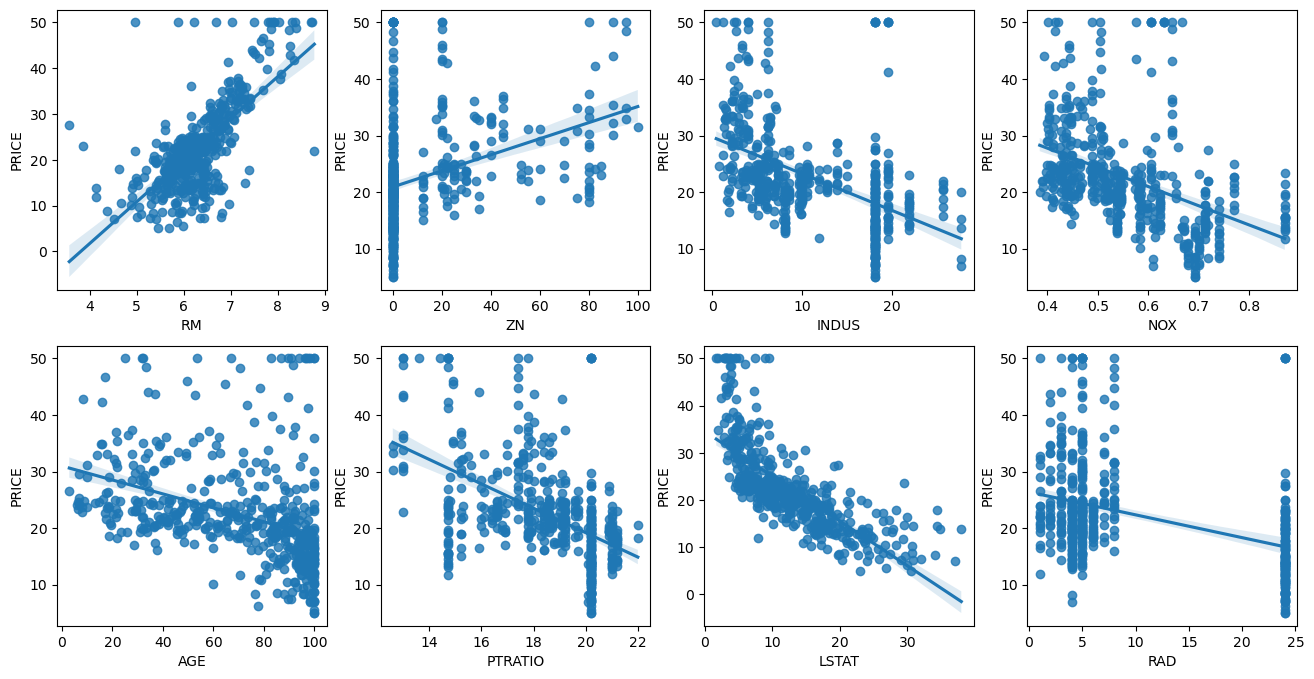

In [16]:
# 타겟과 피처의 관계성 살펴보기
fig, axs = plt.subplots(figsize = (16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = i//4
    col = i%4
    sns.regplot(data=boston_df,x=feature,y='PRICE',ax=axs[row][col])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop('PRICE',axis=1,inplace=False)

X_train, X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr= LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds))) # 분산 기준으로 측정 1에 가까울수록 좋다.

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [22]:
# 절편과 회귀계수 값
print('절편 값 :',lr.intercept_)
print('회귀 계수 값 :',np.round(lr.coef_,1)) # 반환값이 ndarray

절편 값 : 40.9955951721644
회귀 계수 값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [23]:
coef = pd.Series(data=np.round(lr.coef_,1),index = X_data.columns)
coef.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [29]:
# 교차 검증을 사용
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 폴드 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5) # 네거티브를 사용
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2)) 
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE 5.829


In [31]:
# 예측 성능을 높이기 위해 선형회귀 중 다항회귀 활용
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print(X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(poly_ftr)

[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


# 회귀 트리

In [39]:
#교차검증으로 평균RMSE 계산
def get_model_cv_prediction(model,X_data,y_target):
    neg_mse_scores = cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####',model.__class__.__name__,'####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000) 
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000) 
xgb_reg = XGBRegressor(n_estimators=1000)
# lgb_reg = LGBMRegressor(n_estimators=1000)

#트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg
        #   , lgb_reg
          ] 
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#### DecisionTreeRegressor ####
 5 교차 검증의 평균 RMSE : 5.978
#### RandomForestRegressor ####
 5 교차 검증의 평균 RMSE : 4.423
#### GradientBoostingRegressor ####
 5 교차 검증의 평균 RMSE : 4.269
#### XGBRegressor ####
 5 교차 검증의 평균 RMSE : 4.959


<AxesSubplot:xlabel='None', ylabel='None'>

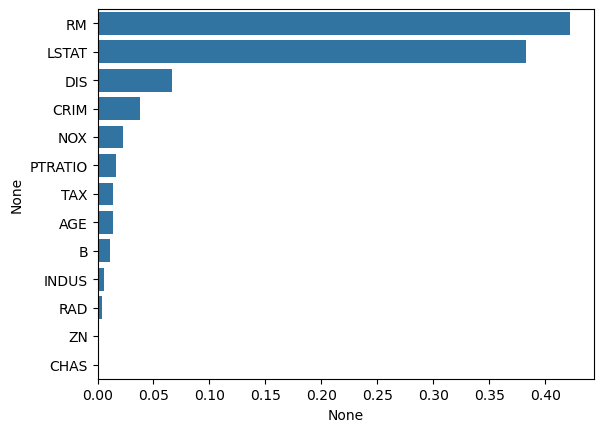

In [42]:
# cart는 coef속성이 없음
# 대신 feature_importances를 이용해 피처별 중요도를 알 수 있다.
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data,y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)